In [115]:
from numpy import *
from qutip  import *
from matplotlib.pyplot import *
import numpy as np
import qutip as qt
from qutip import *
import matplotlib.pyplot as plt

%matplotlib inline

In [132]:
def H_EIT(del_c, del_p, Omega_c, Omega_p,Gamma_01,Gamma_02,Gamma_12,Gamma_the_01,dephase):
    # Hamiltonian form is given by equation 7.3 from Novokov's thesis
    
    # del_x: detuning from the transitions
    # Omega_x: Rabi frequency for each transitions
    # chi is the dispersive shift, and note that the cavity freq difference when qubit is at |e> or |g> is 2*chi  
    # Qubit subspace: 2x2, Cavity subspace: N+1 x N+1
    for i in range(3):
        for j in range(3):
            globals()['sigma_'+str(i)+str(j)] = basis(3,i)*basis(3,j).dag()
    
    term1 = -(del_c)*sigma_22
    term2 = -del_p*sigma_11
    term3 = (Omega_c/2)*(sigma_02+sigma_20)
    term4 = (Omega_p/2)*(sigma_12+sigma_21)
    H = term1 + term2 + term3 + term4 
    A_relax12   = sigma_12*np.sqrt(Gamma_12)
    A_relax02   = sigma_02*np.sqrt(Gamma_02)
    A_relax01   = sigma_01*np.sqrt(Gamma_01)
    A_the_pump01   = sigma_10*np.sqrt(Gamma_the_01)
    A_dephase = sigma_01 * np.sqrt(dephase)
    return H,[A_relax12,A_relax02,A_relax01, A_the_pump01,A_dephase]

In [133]:
def EIT_Spectrum(Omega_c, Omega_p,Gamma_01,Gamma_02,Gamma_12,Gamma_the_01,dephase,del_list,del_control, control="NO"):
    
    spec = np.zeros(len( del_list), dtype=np.float64)
    speci = np.zeros(len( del_list), dtype=np.float64)
    pop_00 = np.zeros(len( del_list), dtype=np.float64)
    pop_11 = np.zeros(len( del_list), dtype=np.float64)
    pop_22 = np.zeros(len( del_list), dtype=np.float64)
    
    def spectrum(H, c_ops):
        rho_ss= steadystate(H, c_ops,solver='scipy')
        spec = rho_ss[1, 2].imag
        speci = rho_ss[1, 2].real
        pop_00 = rho_ss[0, 0].real
        pop_11 =rho_ss[1, 1].real#expect(num(2) ,ptrace(rho_ss,0))#rho_ss[N+1, N+1].real
        pop_22 =rho_ss[2, 2].real
        return spec, pop_00, pop_11, pop_22 ,speci
    
    if control=="Probe":
        for i, del_c in enumerate(del_list):
            H ,c_ops = H_EIT(del_c,del_control, Omega_c, Omega_p,Gamma_01,Gamma_02,Gamma_12,Gamma_the_01,dephase)
            spec[i], pop_00[i], pop_11[i], pop_22[i],speci[i] = spectrum(H ,c_ops)
    
    else:
        for i, del_p in enumerate(del_list):
            H ,c_ops = H_EIT(del_control,del_p, Omega_c, Omega_p,Gamma_01,Gamma_02,Gamma_12,Gamma_the_01,dephase)
            spec[i], pop_00[i], pop_11[i], pop_22[i],speci[i] = spectrum(H ,c_ops)
            
    return pop_11, pop_00, pop_22, spec,speci

(0.0, 1.0)

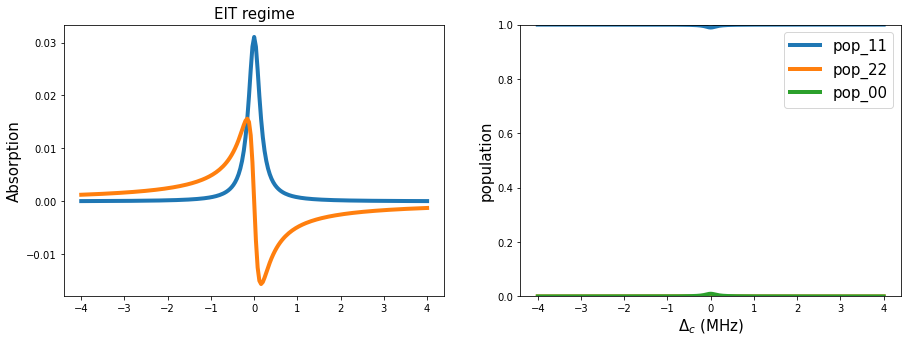

In [134]:
start=-4
end=4
point=201
del_control=0* (2*np.pi)
Omega_c = 0* (2*np.pi)
Omega_p =  0.01* (2*np.pi)

Gamma_01=0
Gamma_02=1
Gamma_12=1
Gamma_the_01=0.1
dephase =0
del_list = 2*pi*np.linspace(start, end, point)

pop_11 = np.zeros(point)
pop_22 = np.zeros(point)
pop_00 = np.zeros(point)
spect = np.zeros(point)
speci = np.zeros(point)

plt.figure(figsize=(15,5))
pop_11, pop_00, pop_22, spect,speci= EIT_Spectrum(Omega_c,Omega_p,Gamma_01,Gamma_02,Gamma_12,Gamma_the_01,dephase,del_list,del_control)

plt.subplot(1,2,1)
plt.plot(del_list/(2*pi), spect,label="spec",linewidth=4)
plt.plot(del_list/(2*pi), speci,label="speci",linewidth=4)
plt.ylabel("Absorption",fontsize=15)
plt.title("EIT regime",fontsize=15)
plt.subplot(1,2,2)
plt.plot(del_list/(2*pi),pop_11,label="pop_11",linewidth=4)
plt.plot(del_list/(2*pi), pop_22,label="pop_22",linewidth=4)
plt.plot(del_list/(2*pi), pop_00,label="pop_00",linewidth=4)
plt.xlabel(r"$\Delta_c$ (MHz)",fontsize=15)
plt.ylabel("population",fontsize=15)
plt.legend(fontsize=15)
plt.ylim([0,1])

In [131]:
sigma_12

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]